In [351]:
import pandas as pd
import numpy as np
import seaborn as sn
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [352]:
price=pd.read_excel (r'C:\Users\91890\Desktop\Majorproject\Data_Train (1).xlsx')


In [353]:
price.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [354]:
price.shape

(6019, 12)

SPLITTING THE NAME COLUMN INTO THREE DIFFERENT COLUMNS FOR BETTER TRAINING OF THE MODEL

In [355]:
new = price["Name"].str.split(" ", n = 1, expand = True) 
price["Brand"]= new[0] 
price["Models"]= new[1] 
  

In [356]:
new = price["Models"].str.split(" ", n = 1, expand = True)  
price["Model"]= new[0] 
price["Version"]= new[1] 
price.drop(columns =["Models"], inplace = True) 
price.drop(columns =["Name"], inplace = True) 

In [357]:
price.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Version
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic


REMOVING THE UNITS AS THEY ARE NOT NEEDED FOR MODEL TRAINING 

In [358]:
price['Mileage']=price.Mileage.str.replace('km/kg','').str.replace('kmpl','').astype(float)
price['Engine']=price.Engine.str.replace('CC','').astype(float)
price['Power']=price.Power.str.replace('bhp','')

COUNTING THE MISSING VALUES IN EACH OF THE COLUMNS

In [359]:
price.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
Model                 0
Version               0
dtype: int64

In [360]:
price.shape

(6019, 14)

In [361]:
price.dtypes


Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
Brand                 object
Model                 object
Version               object
dtype: object

In [362]:
price.Power=price.Power.str.replace('null','0').astype(float)

PERFORMING EDA AND FINDING HOW THE COLUMS ARE RELATED WITH THE PRICE COLUMN

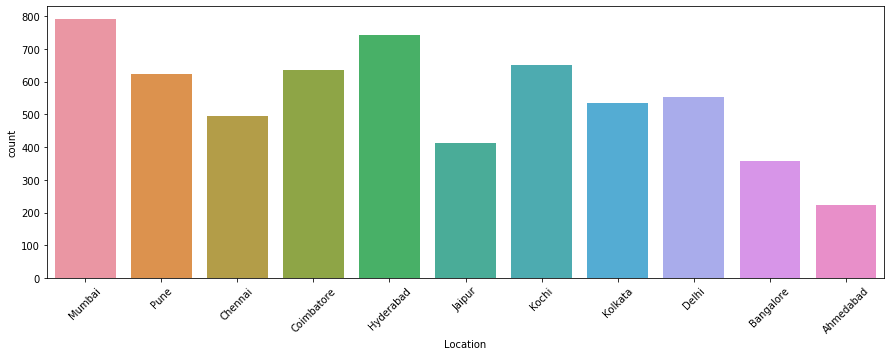

In [363]:
plt.figure(figsize=(15,5))
carplot=sn.countplot(price["Location"])
carplot.set_xticklabels(carplot.get_xticklabels(), rotation=45)
plt.show()

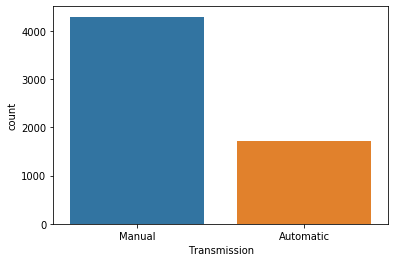

In [364]:
sn.countplot(price["Transmission"])
plt.show()

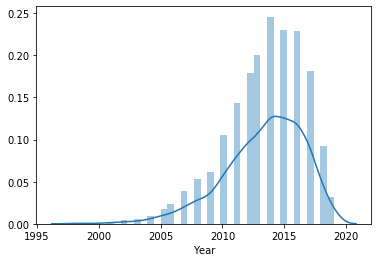

In [365]:
sn.distplot(price['Year'],kde=True)


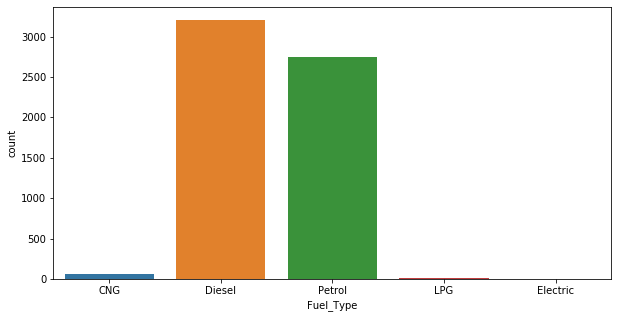

In [366]:
plt.figure(figsize=(10,5))
sn.countplot(price["Fuel_Type"])

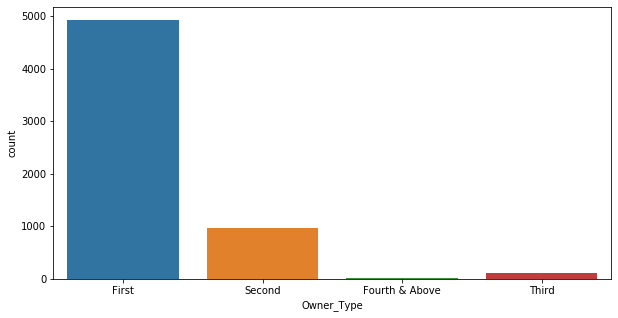

In [367]:
plt.figure(figsize=(10,5))
sn.countplot(price["Owner_Type"])

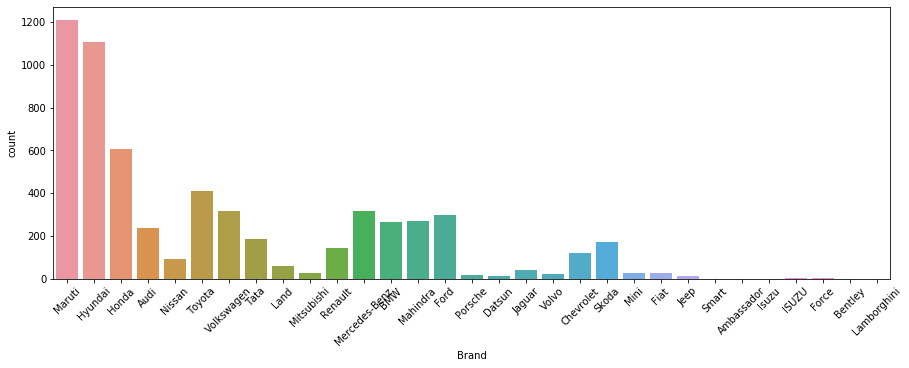

In [368]:
plt.figure(figsize=(15,5))
carplot=sn.countplot(price["Brand"])
carplot.set_xticklabels(carplot.get_xticklabels(), rotation=45)
plt.show()

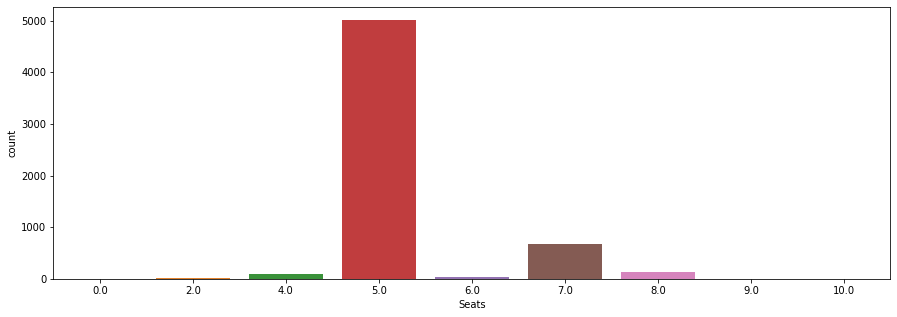

In [369]:
plt.figure(figsize=(15,5))
sn.countplot(price["Seats"])

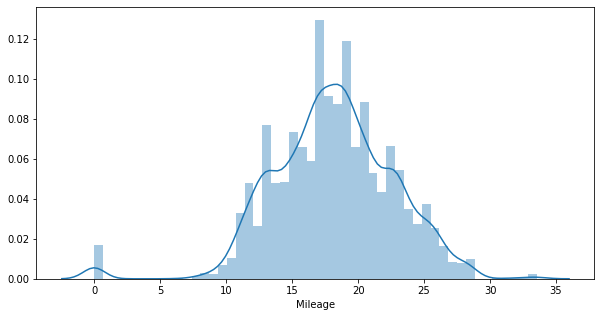

In [370]:
plt.figure(figsize=(10,5))
sn.distplot(price['Mileage'],kde=True)

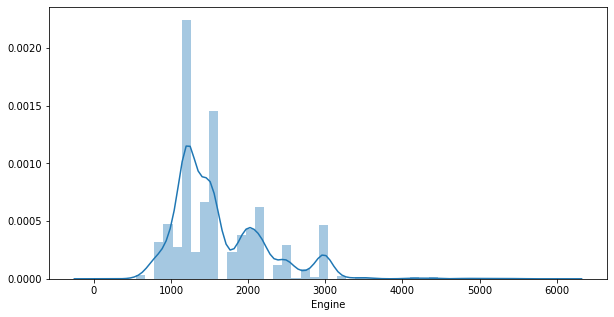

In [371]:
plt.figure(figsize=(10,5))
sn.distplot(price['Engine'],kde=True)

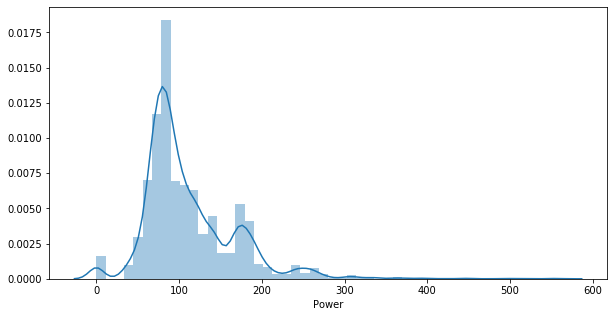

In [372]:
plt.figure(figsize=(10,5))
sn.distplot(price['Power'],kde=True)

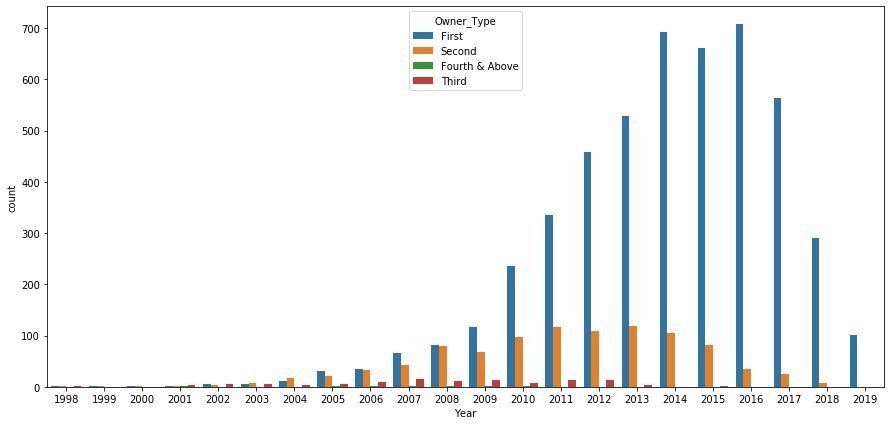

In [373]:
plt.figure(figsize=(15,7))
sn.countplot(price["Year"],hue=price['Owner_Type'])
plt.show()

IDNETIFYING THE OUTLIERS PRESENT IN THE DATSET

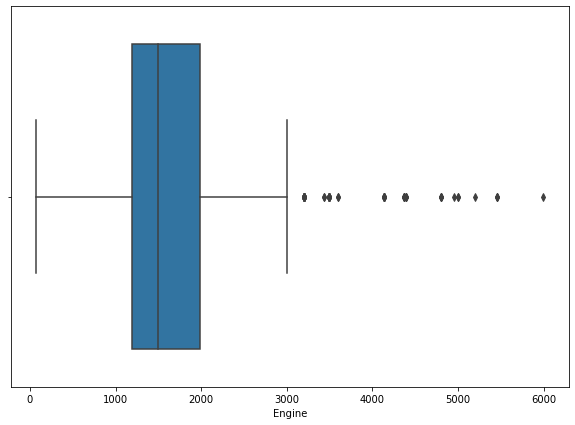

In [374]:
plt.figure(figsize=(10,7))
sn.boxplot('Engine',data=price)

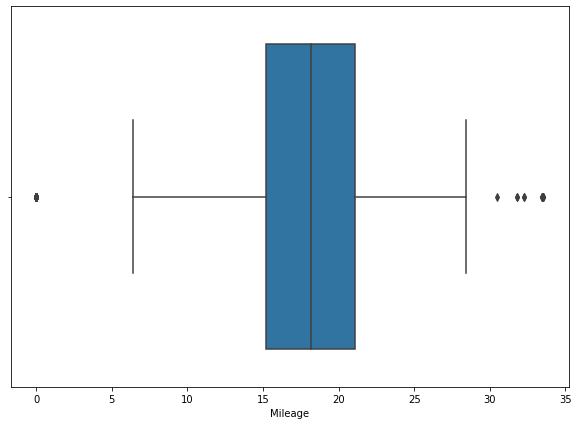

In [375]:
plt.figure(figsize=(10,7))
sn.boxplot('Mileage',data=price)

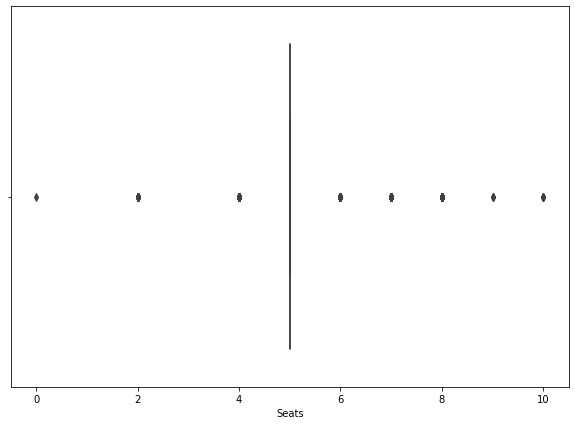

In [376]:
plt.figure(figsize=(10,7))
sn.boxplot('Seats',data=price)

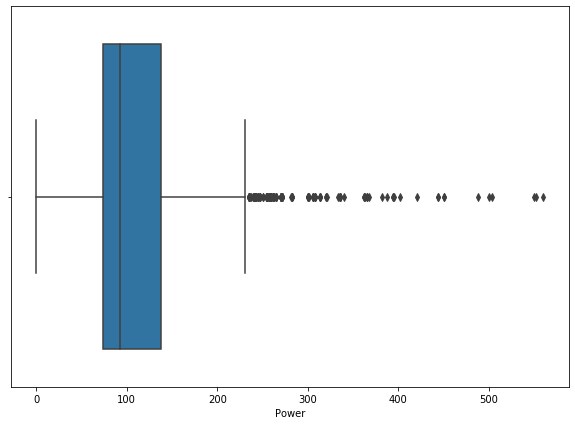

In [377]:
plt.figure(figsize=(10,7))
sn.boxplot('Power',data=price)

In [378]:
le=preprocessing.LabelEncoder()
price['Fuel_Type']=le.fit_transform(price['Fuel_Type'])
price['Owner_Type']=le.fit_transform(price['Owner_Type'])
price['Transmission']=le.fit_transform(price['Transmission'])



In [379]:
price['Location']=le.fit_transform(price['Location'])
price['Brand']=le.fit_transform(price['Brand'])
price['Model']=le.fit_transform(price['Model'])
price['Version']=le.fit_transform(price['Version'])

In [380]:
price.dtypes


Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                  int32
Model                  int32
Version                int32
dtype: object

In [381]:
price.shape

(6019, 14)

FILLING IN THE MISSING VALUES AND REMOVING THE OUTLIERS  

In [382]:
price.fillna(price.mean(), inplace=True)

In [383]:
price.Seats.mean()

5.27873515141375

In [384]:
price.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
Version              0
dtype: int64

In [385]:
price.shape

(6019, 14)

FINDING  Z SCORE VALUE TO IDENTIFY AND REMOVE OUTLIERS

In [386]:
z = np.abs(stats.zscore(price))
print(z)

[[1.14365818 1.02713851 0.14531489 ... 0.33132605 1.2290421  0.58198804]
 [1.48198899 0.50216112 0.19436922 ... 0.66226004 0.84698996 1.36909725]
 [1.22465746 0.72127858 0.13958146 ... 0.7864583  0.14480264 1.04569008]
 ...
 [0.12866576 0.41541866 0.0409635  ... 0.20712779 1.45801622 0.12928374]
 [0.80532737 0.10955873 0.13958146 ... 0.33132605 1.2290421  0.59574191]
 [0.20966505 0.72127858 0.12862391 ... 1.4074496  1.25914338 0.08016276]]


IF ANY Z SCORE VALUE IS GREATER THAN THE THRESHOLD VALUE THEN REMOVE THAT VALUES FORM THE DATSET  

In [387]:
threshold = 3
print(np.where(z > 3))



(array([   7,   14,   54,   60,   67,   70,   70,   77,   77,   79,  125,
        134,  134,  134,  143,  148,  152,  152,  168,  185,  191,  194,
        216,  229,  245,  257,  262,  264,  271,  274,  274,  276,  282,
        307,  310,  311,  315,  326,  326,  327,  330,  340,  355,  356,
        358,  364,  368,  373,  375,  392,  392,  404,  418,  418,  424,
        441,  443,  459,  459,  459,  473,  489,  506,  521,  544,  557,
        577,  586,  586,  589,  589,  593,  597,  598,  602,  603,  608,
        613,  615,  623,  629,  631,  631,  631,  647,  652,  655,  693,
        693,  693,  693,  698,  699,  707,  712,  719,  733,  749,  753,
        760,  768,  771,  774,  790,  798,  798,  798,  798,  802,  814,
        830,  860,  866,  911,  911,  913,  915,  915,  917,  918,  926,
        926,  941,  962,  965,  996, 1008, 1013, 1038, 1038, 1038, 1046,
       1059, 1060, 1078, 1078, 1093, 1093, 1093, 1113, 1123, 1138, 1158,
       1181, 1194, 1221, 1221, 1222, 1224, 1228, 1

In [388]:
pricen= price[(z <3).all(axis=1)]

In [389]:
pricen.shape

(5484, 14)

DIVIDING THE DATASET IN TWO SETS X AND Y, WHERE X IS THE VALUES WHICH WE WILL BE USED TO PREDICT Y 

x = price.drop('Price',axis=1)
y = price.Price

In [390]:
x1 = pricen.drop('Price',axis=1)
y1= pricen.Price

SPLITTING THE DATA INTO TRAIN AND TEST DATASET

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)


In [391]:
x1Train, x1Test, y1Train, y1Test = train_test_split(x1, y1, test_size = 0.2)

APPLYING LINEAR REGRESSION ON THE TRAIN DATASET AND PREDICTING THE VALUES USING THE TEST DATASET

linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)

In [392]:
linearRegressor = LinearRegression()
linearRegressor.fit(x1Train, y1Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

ypred=linearRegressor.predict(xTest)
ytpred0 = linearRegressor.predict(xTrain)

In [393]:
y1pred=linearRegressor.predict(x1Test)


PRINTING THE MAE AND MSE VALUES

In [394]:
print(mean_absolute_error(y1Test, y1pred))

print(mean_squared_error(y1Test, y1pred))

2.741501098448677
15.679714721925297


PRINTING THE R2 SCORE TO CHECK THE ACCURACY ON TEST DATASET

print(r2_score(yTest, ypred)*100)

In [395]:
print(r2_score(y1Test, y1pred)*100)

72.93373112173964


APPLYING THE RANDOM FOREST REGRESSOR  

In [396]:
rregressor = RandomForestRegressor()
rregressor.fit(x1Train, y1Train)
y1pred1 = rregressor.predict(x1Test)


In [397]:
print(mean_absolute_error(y1Test, y1pred1))

print(mean_squared_error(y1Test, y1pred1))



1.1067543755697362
4.145145584791479


In [398]:
print(r2_score(y1Test, y1pred1)*100)

92.84466414553978


APPLYING THE XGBOOST REGRESSOR 

In [399]:
xregressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=5,
    min_child_weight= 5
)

In [400]:
xregressor.fit(xTrain, yTrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [401]:
xregressor.fit(x1Train, y1Train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [402]:
y2pred2=xregressor.predict(x1Test)

In [403]:
print(mean_absolute_error(y1Test, y2pred2))

print(mean_squared_error(y1Test, y2pred2))


0.9496395448999396
3.0215114961715455


print(r2_score(yTest, ypred2)*100)

In [405]:
print(r2_score(y1Test, y2pred2)*100)

94.78427739123482


AFTER OBSERVING THE R2 SCORE WE CAN CONCLUDE THAT XGBOOST IS BEST SUITED FOR PREDICTING THE VALUES

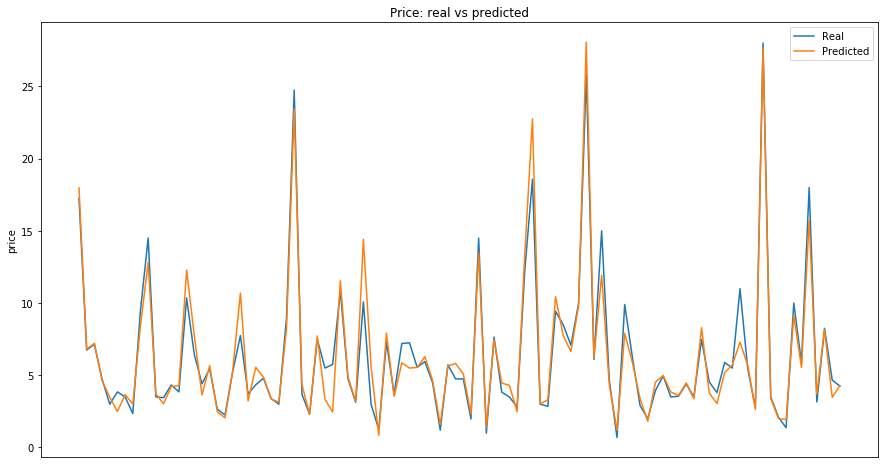

In [459]:
xregressor.fit(x1Train,y1Train)
y_pred=xregressor.predict(x1Test)
A = y1Test.values.reshape(-1, 1)
B = y_pred.reshape(-1, 1)
plt.rcParams['figure.figsize'] = 15,8
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())
plt.show()

WE CAN SEE THAT THE VALUES ARE PREDICTED PERFECTLY AND NOW WE WILL PREDICT THE PRICE ON THE TEST DATASET

NOW WE WILL READ THE TEST DATASET

In [505]:
pprice=pd.read_excel (r'C:\Users\91890\Desktop\Majorproject\Data_Test (1).xlsx')
TestData=pd.read_excel (r'C:\Users\91890\Desktop\Majorproject\Data_Test (1).xlsx')

In [506]:
pprice.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [507]:
new = pprice["Name"].str.split(" ", n = 1, expand = True) 
pprice["Brand"]= new[0] 
pprice["Models"]= new[1] 
  

In [508]:
new = pprice["Models"].str.split(" ", n = 1, expand = True)  
pprice["Model"]= new[0] 
pprice["Version"]= new[1] 
pprice.drop(columns =["Models"], inplace = True) 
pprice.drop(columns =["Name"], inplace = True) 

In [509]:
pprice.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Version
0,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,Maruti,Alto,K10 LXI CNG
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,Maruti,Alto,800 2016-2019 LXI
2,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota,Innova,Crysta Touring Sport 2.4 MT
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,Toyota,Etios,Liva GD
4,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai,i20,Magna


In [510]:
pprice['Mileage']=pprice.Mileage.str.replace('km/kg','').str.replace('kmpl','').astype(float)
pprice['Engine']=pprice.Engine.str.replace('CC','').astype(float)
pprice['Power']=pprice.Power.str.replace('bhp','')

In [511]:
pprice.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Version
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.2,4.0,Maruti,Alto,K10 LXI CNG
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.3,5.0,Maruti,Alto,800 2016-2019 LXI
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.8,7.0,Toyota,Innova,Crysta Touring Sport 2.4 MT
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,null,5.0,Toyota,Etios,Liva GD
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,Hyundai,i20,Magna


In [512]:
pprice.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
Brand                 0
Model                 0
Version               1
dtype: int64

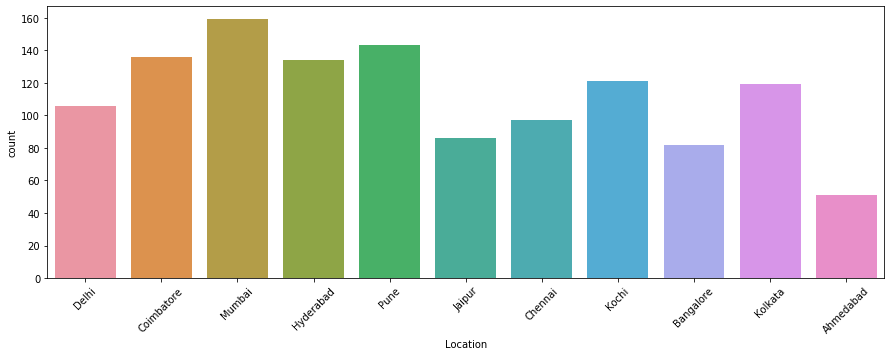

In [513]:
plt.figure(figsize=(15,5))
carplot=sn.countplot(pprice["Location"])
carplot.set_xticklabels(carplot.get_xticklabels(), rotation=45)
plt.show()

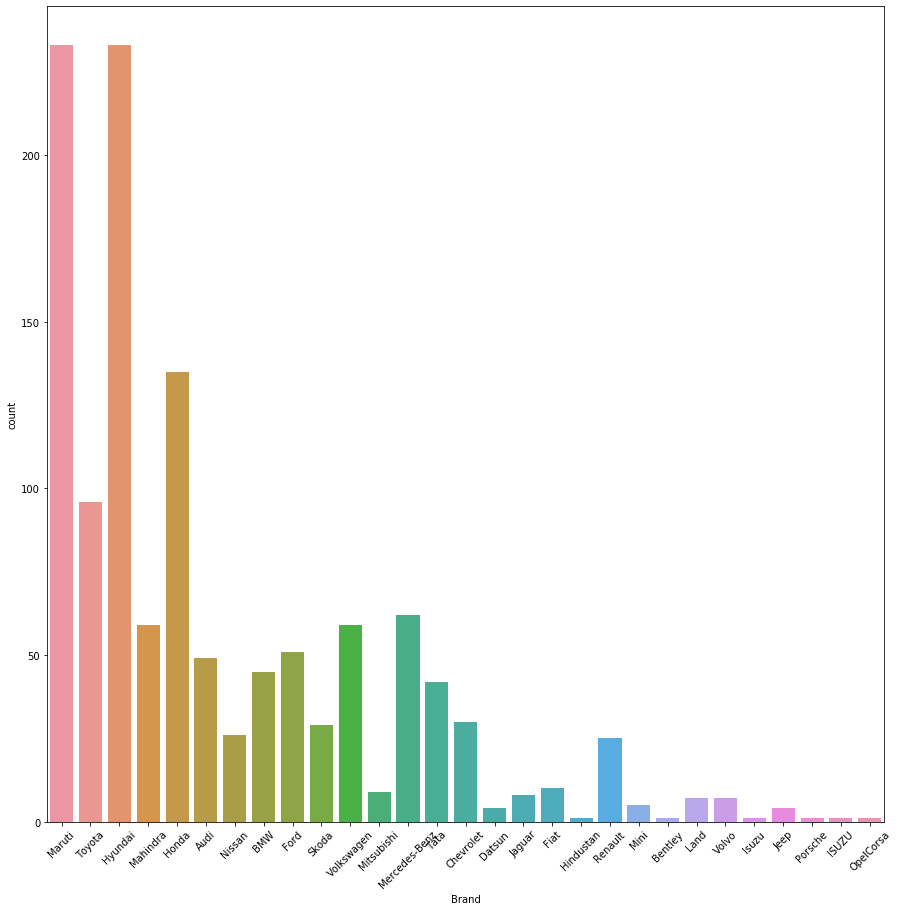

In [514]:
plt.figure(figsize=(15,15))
carplot=sn.countplot(pprice["Brand"])
carplot.set_xticklabels(carplot.get_xticklabels(), rotation=45)
plt.show()

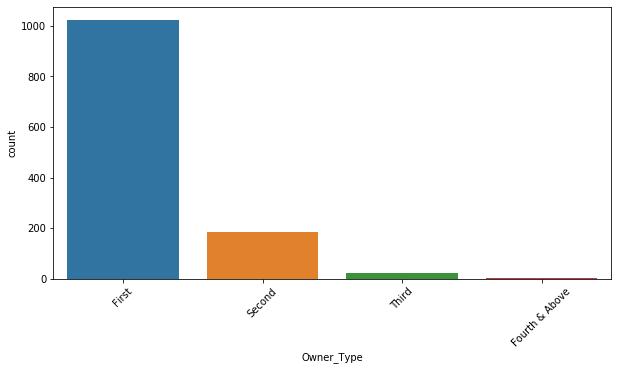

In [515]:
plt.figure(figsize=(10,5))
carplot=sn.countplot(pprice["Owner_Type"])
carplot.set_xticklabels(carplot.get_xticklabels(), rotation=45)
plt.show()

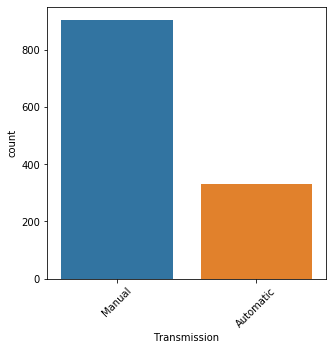

In [516]:
plt.figure(figsize=(5,5))
carplot=sn.countplot(pprice["Transmission"])
carplot.set_xticklabels(carplot.get_xticklabels(), rotation=45)
plt.show()

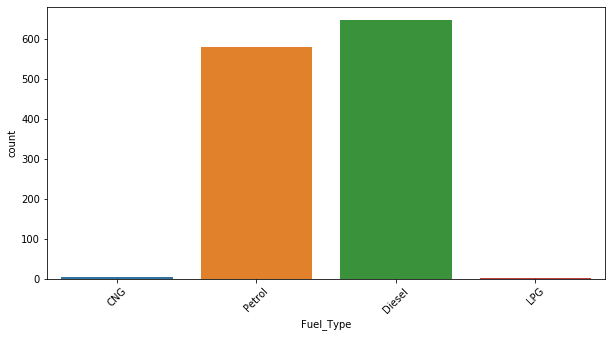

In [517]:
plt.figure(figsize=(10,5))
carplot=sn.countplot(pprice["Fuel_Type"])
carplot.set_xticklabels(carplot.get_xticklabels(), rotation=45)
plt.show()

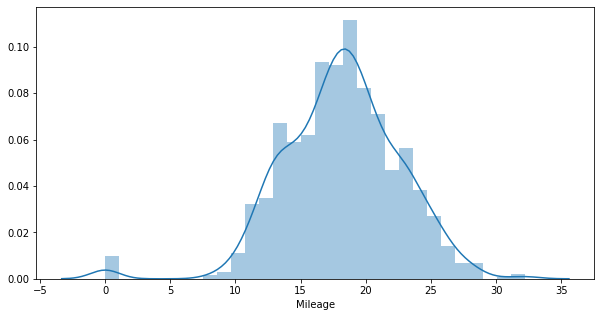

In [518]:
plt.figure(figsize=(10,5))
sn.distplot(pprice['Mileage'],kde=True)

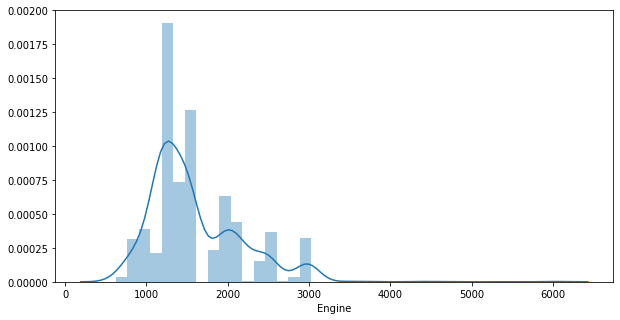

In [519]:
plt.figure(figsize=(10,5))
sn.distplot(pprice['Engine'],kde=True)

In [520]:
pprice.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Brand                 object
Model                 object
Version               object
dtype: object

In [521]:
pprice.Power=pprice.Power.str.replace('null','0').astype(float)

In [522]:
pprice.Power.head(10)

0     58.20
1     47.30
2    147.80
3      0.00
4     82.85
5    140.00
6    168.70
7     55.20
8    118.00
9    140.00
Name: Power, dtype: float64

In [523]:
pprice.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Brand                 object
Model                 object
Version               object
dtype: object

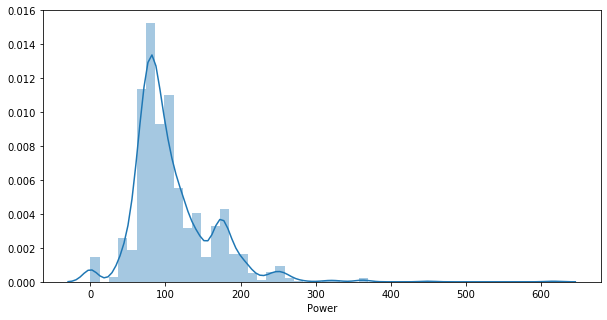

In [524]:
plt.figure(figsize=(10,5))
sn.distplot(pprice['Power'],kde=True)

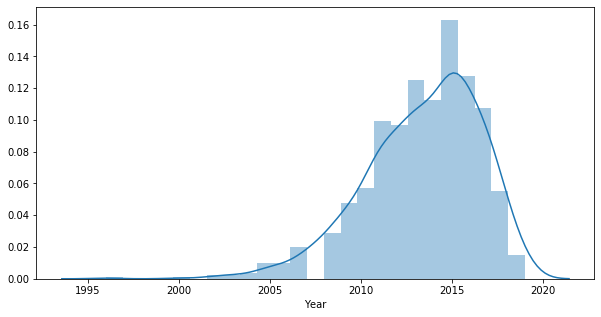

In [525]:
plt.figure(figsize=(10,5))
sn.distplot(pprice['Year'],kde=True)

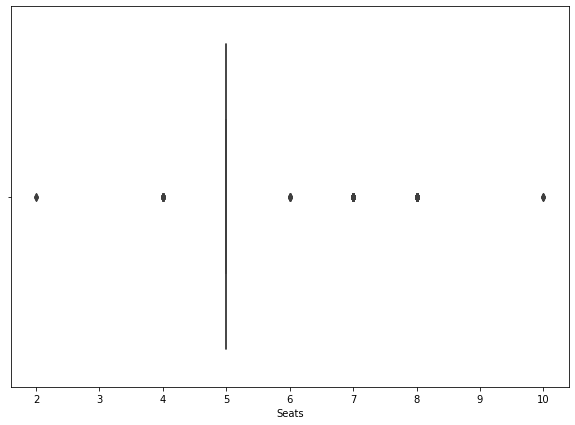

In [526]:
plt.figure(figsize=(10,7))
sn.boxplot('Seats',data=pprice)

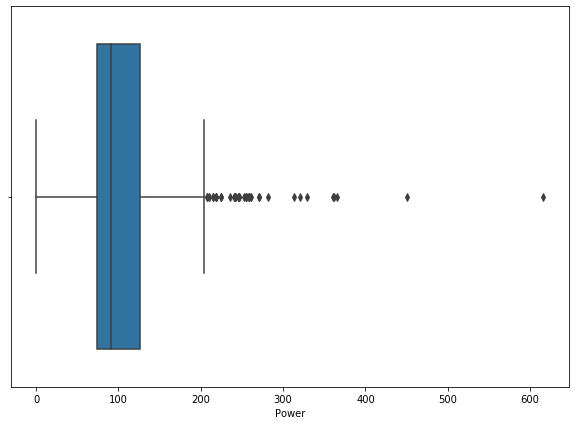

In [527]:
plt.figure(figsize=(10,7))
sn.boxplot('Power',data=pprice)

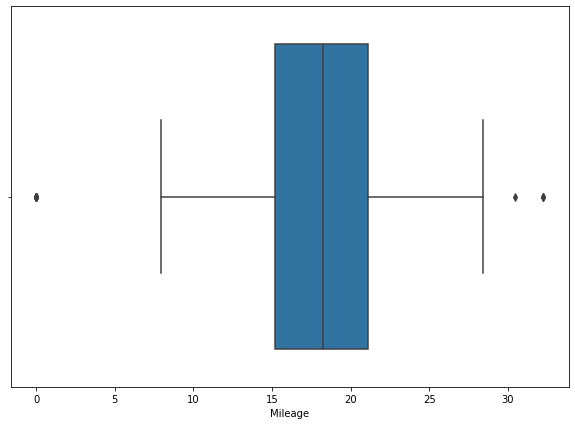

In [528]:
plt.figure(figsize=(10,7))
sn.boxplot('Mileage',data=pprice)

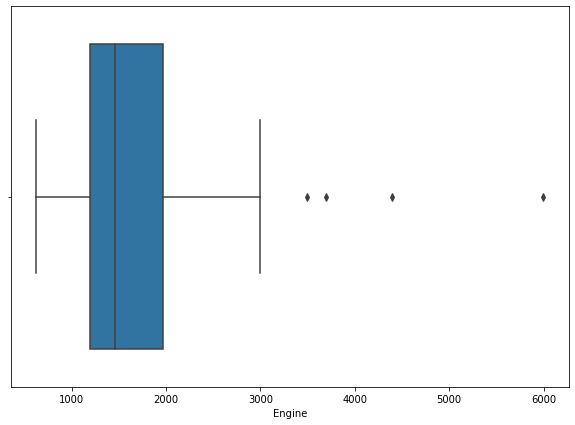

In [529]:
plt.figure(figsize=(10,7))
sn.boxplot('Engine',data=pprice)

In [530]:
pprice.Version = [str(i or '') for i in pprice.Version] 
  

In [531]:
le=preprocessing.LabelEncoder()
pprice['Location']=le.fit_transform(pprice['Location'])
pprice['Brand']=le.fit_transform(pprice['Brand'])
pprice['Model']=le.fit_transform(pprice['Model'])


In [532]:

pprice['Fuel_Type']=le.fit_transform(pprice['Fuel_Type'])
pprice['Owner_Type']=le.fit_transform(pprice['Owner_Type'])
pprice['Transmission']=le.fit_transform(pprice['Transmission'])


In [533]:
pprice['Version']=le.fit_transform(pprice['Version'])

In [534]:
pprice.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
Brand                 0
Model                 0
Version               0
dtype: int64

In [535]:
pprice=pprice.fillna(pprice.median())

In [536]:
pprice.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Brand                0
Model                0
Version              0
dtype: int64

In [537]:
pprice.Version.isnull().sum()

0

In [538]:
pprice.Version

0       459
1       260
2       360
3       484
4       494
       ... 
1229    386
1230    449
1231    388
1232    449
1233    194
Name: Version, Length: 1234, dtype: int32

In [539]:
price.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Version
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,18,189,1216
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,10,53,223
2,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50,9,99,1452
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,18,69,1478
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,1,10,1162


In [540]:
pprice.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Version
0,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0,16,16,459
1,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0,16,16,260
2,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0,26,78,360
3,5,2012,139000,1,1,0,23.59,1364.0,0.00,5.0,26,60,484
4,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0,9,159,494


In [541]:
pprice.dtypes

Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Brand                  int32
Model                  int32
Version                int32
dtype: object

names=xregressor.get_booster().feature_names

pprice=pprice[names]



In [542]:
pred=xregressor.predict(pprice)

In [543]:
PredPrice=pd.Series(pred,name='Price')

In [544]:
PredPrice

0        5.382768
1        5.782829
2       19.308161
3        3.938305
4        4.204105
          ...    
1229     4.747694
1230     5.947754
1231     3.391954
1232     4.502255
1233    17.977934
Name: Price, Length: 1234, dtype: float32

In [545]:
pprice=pd.concat([pprice,pd.Series(PredPrice,name='Price')],axis=1)


In [546]:
pprice

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Version,Price
0,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0,16,16,459,5.382768
1,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0,16,16,260,5.782829
2,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0,26,78,360,19.308161
3,5,2012,139000,1,1,0,23.59,1364.0,0.00,5.0,26,60,484,3.938305
4,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0,9,159,494,4.204105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,5,2011,89411,1,1,0,20.54,1598.0,103.60,5.0,27,137,386,4.747694
1230,9,2015,59000,3,0,0,17.21,1197.0,103.60,5.0,27,101,449,5.947754
1231,8,2012,28000,1,1,0,23.08,1461.0,63.10,5.0,20,91,388,3.391954
1232,10,2013,52262,3,0,3,17.20,1197.0,103.60,5.0,27,101,449,4.502255


In [547]:
TestData=pd.concat([TestData,pd.Series(PredPrice,name='Price')],axis=1)


In [548]:
TestData

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,5.382768
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,5.782829
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,19.308161
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,3.938305
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,4.204105
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,4.747694
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,5.947754
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.391954
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,4.502255
